In [910]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [911]:
data = pd.read_csv("train.csv")

In [912]:
class Convolution2D:
    """
    A simple 2D convolution layer implementation using NumPy.
    """

    kernels = np.array(
    ([
        [0, -1, 0],
        [-1, 5, -1], # Sharpen
        [0, -1, 0]
    ],
    [
        [-2, -1, 0],
        [-1, 1, 1], # Emboss
        [0, 1, 2]
    ],
    [
        [1, 0, -1],
        [1, 0, -1], # Edge (Vertical)
        [1, 0, -1]
    ],
    [
        [1,  1,  1],
        [0,  0,  0], # Edge (Horizontal)
        [-1, -1, -1]
    ]))

    def __init__(self, kernels= kernels, padding_shape= (2,2)):
        self.kernels = kernels
        self.padding_row, self.padding_col = padding_shape
        self.kernel_row, self.kernel_col = kernels[0].shape


    def padding_image(self, image):
        pad_width = ((self.padding_row, self.padding_row), (self.padding_col, self.padding_col))
        padded_image = np.pad(image, pad_width, mode="constant", constant_values=0)
        return padded_image
        
    def process_region(self, image, kernel, row, col):
        region = image[row: row + self.kernel_row,
                       col: col + self.kernel_col]
        
        kernel_value = np.sum(np.multiply(region, kernel))
        self.output_kernel[row, col] = kernel_value


    def full_correlation(self, image, kernel):
        row_offset = image.shape[1] - self.kernel_col + 1
        col_offset = image.shape[0] - self.kernel_row + 1

        self.output_kernel = np.zeros((row_offset, col_offset), dtype=float)

        for row in range(row_offset):
            for col in range(col_offset):
                self.process_region(image, kernel, row=row, col=col)

        return self.output_kernel
    
    
    def forward(self, images):
        output = []

        for image in images:
            padded_image = self.padding_image(image)
            for kernel in self.kernels:
                cor_result = self.full_correlation(padded_image, kernel)
                output.append(cor_result)

 
        return np.asarray(output)


In [913]:
class ActivationLayer:

    @classmethod
    def ReLU(cls, Z):
        return np.maximum(0, Z)
    
    @classmethod    
    def ReLU_deriv(cls, Z):
        return np.uint8(Z > 0)
    
    @classmethod
    def softmax(cls, Z):
        A = np.exp(Z) / np.sum(np.exp(Z))
        return A
    
    @classmethod    
    def softmax_deriv(cls, Z):
        S = cls.softmax(Z)
        return S * (np.eye(S.shape[0]) - S.T)
    
    @classmethod
    def sigmoid(cls, Z):
        return 1 / (1 + np.exp(-Z))
    
    @classmethod
    def sigmoid_derivative(cls, Z):
        sigma_x = cls.sigmoid(Z)
        return sigma_x * (1 - sigma_x)

        

In [914]:
class PoolLayer2D:
    def __init__(self, pool_size = (2,2)):
        self.pool_size = pool_size

    def max_pooling(self, images):
        
        result = []
        for image in images:
            height, width = image.shape
            pool_row, pool_col = self.pool_size

            pool_height = height // pool_row
            pool_width = width // pool_col

            pool = np.zeros((pool_height, pool_width))

            for i in range(pool_height):
                for j in range(pool_width):
                    pool[i, j] = np.max(image[i * pool_row: (i + 1) * pool_row, j * pool_col: (j + 1) * pool_col])

            result.append(pool)

        return np.asarray(result)

In [915]:
class Settings:
    @classmethod
    def show_img(cls, img, figsize=(8, 4), subplot=(1, 2, 1)):
        plt.figure(figsize=figsize)
        plt.subplot(*subplot)
        plt.imshow(img, cmap="gray")


In [916]:
data = np.asarray(data)

In [917]:
np.random.seed(0)

np.random.shuffle(data)
m, n = data.shape 
data_test = data[0:4]
X_test = data_test[:, 1:n]
X_test = X_test.reshape(-1,28,28)



In [922]:
X_test.shape

conv2D = Convolution2D()
pool2D = PoolLayer2D((2,2))
conv_data = conv2D.forward(X_test)
activ_data = ActivationLayer.ReLU(conv_data)
activ_data = ActivationLayer.sigmoid(activ_data)
pool_data = pool2D.max_pooling(activ_data)

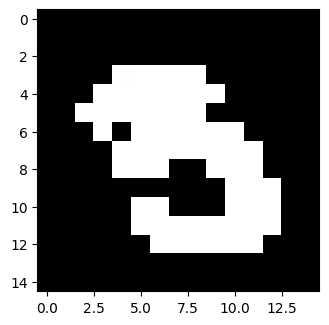

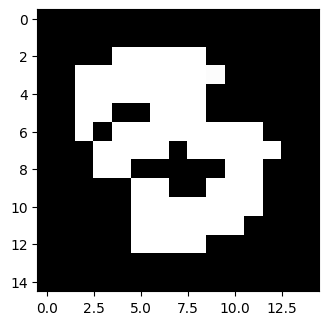

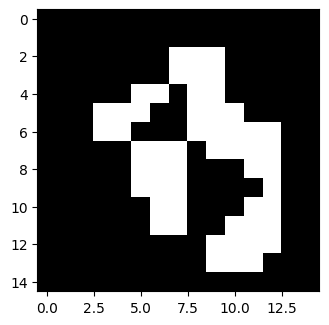

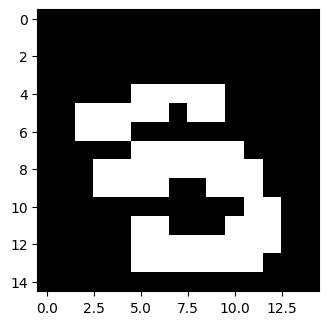

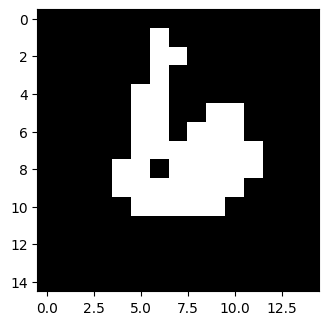

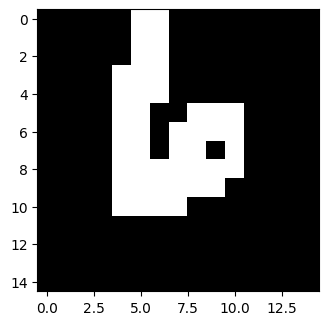

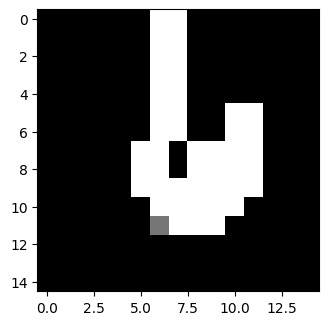

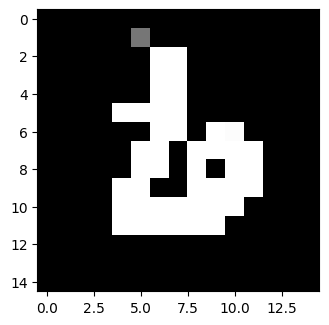

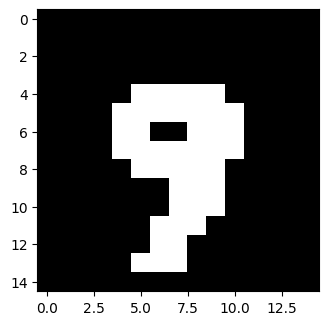

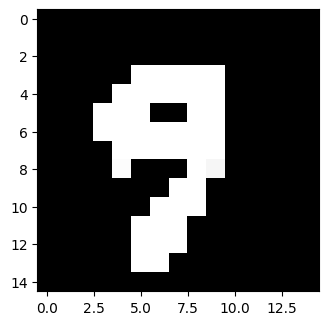

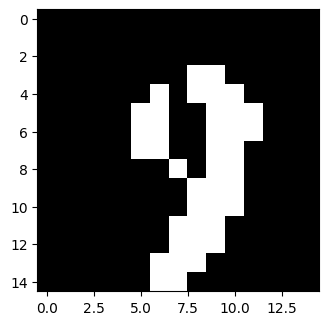

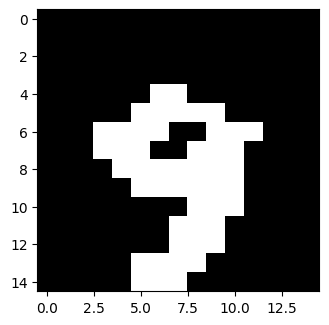

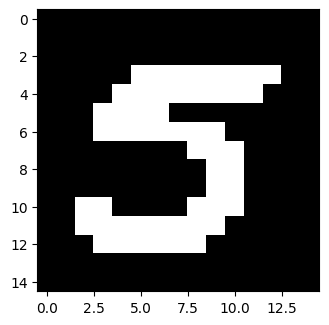

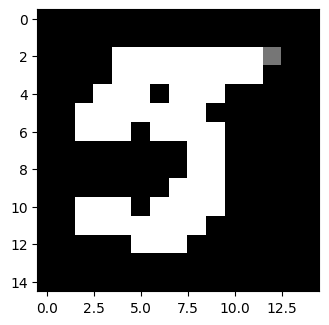

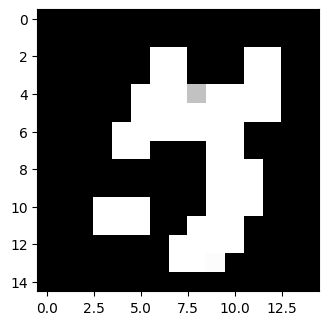

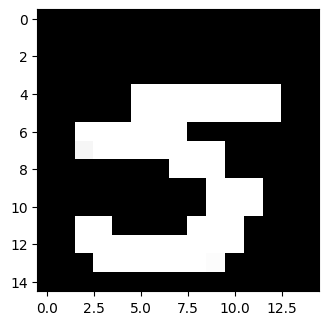

In [923]:
for data in pool_data:
    Settings.show_img(data)